<a href="https://colab.research.google.com/github/Sathishk2/Computer-Vision/blob/main/NN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CIFAR**

In [ ]:
import tensorflow as tf
print(tf.__version__)

#
# Check if we got GPU
#
print(tf.test.gpu_device_name()) #Returns the name of a GPU device if available

2.15.0



In [ ]:
#
# Mount drive to connect to Google Drive (for accessing input data file)
#
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 1 Prepare Data#

In [ ]:
#
# tf already contains copy of MNIST dataset
# No need to download or import
# No need to clean as it's already been cleaned
# No need to split the data into training/testing as it's already been splitted too
#
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # 60,000 for training, 10,000 for testing
                                                         # dataset already splitted internally to train/test
print(X_train.shape, y_train.shape) #(50000, 32, 32, 3) (50000,)
print(X_test.shape, y_test.shape) #(10000, 32, 32, 3) (10000,)

#
# Data Normalization
#
# (1) convert to Z Standardized Score (x-mean)/std
# (2) Convert via min-max via div by max (i.e. values between 0 and 1)
#
X_train = X_train / 255.0 #normalise to between 0 and 1.0, original is 0 to 255 (i.e. 0 is black, 1 is white)
X_test = X_test / 255.0

#
# One Hot Encoding - convert value to 1D vector
#
y_train = tf.keras.utils.to_categorical(y_train) # will auto detect and convert to 1D vector of 10d
y_test = tf.keras.utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 10)
(10000, 10)


In [ ]:
print(X_train[1023,:])

[[[0.65098039 0.65098039 0.65098039]
  [0.75686275 0.75686275 0.75686275]
  [0.75294118 0.74901961 0.75294118]
  ...
  [0.63137255 0.67058824 0.63529412]
  [0.62745098 0.65882353 0.62745098]
  [0.63529412 0.6627451  0.63529412]]

 [[0.67843137 0.67843137 0.67843137]
  [0.71764706 0.71764706 0.71764706]
  [0.68235294 0.68627451 0.68627451]
  ...
  [0.6627451  0.70588235 0.67843137]
  [0.65490196 0.69411765 0.6627451 ]
  [0.66666667 0.69411765 0.6627451 ]]

 [[0.72156863 0.72941176 0.7254902 ]
  [0.78431373 0.79215686 0.78823529]
  [0.74509804 0.75294118 0.75294118]
  ...
  [0.68235294 0.73333333 0.70588235]
  [0.6745098  0.71372549 0.69019608]
  [0.68235294 0.70980392 0.67843137]]

 ...

 [[0.98039216 0.98039216 0.98039216]
  [0.97647059 0.97647059 0.97647059]
  [0.98823529 0.99215686 0.99215686]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.97647059 0.97647059 0.97647059]
  [0.97647059 0.97647059 0.97647059]]

 [[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]


In [ ]:
print(X_train[1023,12])

[[0.98823529 0.98823529 0.98823529]
 [0.98431373 0.98431373 0.98431373]
 [0.99215686 0.99215686 0.99215686]
 [0.98431373 0.98431373 0.98431373]
 [0.96078431 0.97647059 0.97254902]
 [0.5372549  0.59215686 0.57254902]
 [0.11372549 0.21568627 0.16078431]
 [0.06666667 0.20784314 0.10588235]
 [0.05490196 0.21960784 0.07843137]
 [0.0745098  0.22352941 0.05882353]
 [0.14509804 0.28627451 0.1254902 ]
 [0.21568627 0.3372549  0.19215686]
 [0.26666667 0.35294118 0.21960784]
 [0.32156863 0.37647059 0.24705882]
 [0.36862745 0.41960784 0.28627451]
 [0.43529412 0.48627451 0.35294118]
 [0.4745098  0.53333333 0.41960784]
 [0.34901961 0.42352941 0.27058824]
 [0.31372549 0.39607843 0.18431373]
 [0.37647059 0.43921569 0.21960784]
 [0.45098039 0.4745098  0.28627451]
 [0.46666667 0.45490196 0.30980392]
 [0.5372549  0.50588235 0.39607843]
 [0.65490196 0.64313725 0.56078431]
 [0.53333333 0.56078431 0.49411765]
 [0.12941176 0.19607843 0.13333333]
 [0.02352941 0.11372549 0.03921569]
 [0.10196078 0.19215686 0.12

In [ ]:
print(y_train[1023,:])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
def show_digit_in_training_set(index):
  image = X_train[index] #aleady in 28x28
  plt.imshow(image,cmap='gray')
  plt.show()

#Step 2 Build Model#

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#
# Create Model for Classification
#
model = Sequential() #Define Dense NN model sequentially
model.add(Flatten(input_shape=(32, 32, 3)))  # each pic input is 28x28, this will flatten into 728 internally, we don't have to worry
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #10 classes, need softmax to output probabilities

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               393344    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#
# Specify optimizer, loss function and metrics during compilation
#
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # "accuracy" is for evaluating model performance

#Step 3 Train Model#

In [ ]:
#
# ** Training **
#
# epochs = number of iterations
# batch_size = how much data to randomly used together in each training iteration, typical values 64, 128
#
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test,y_test)) # NOTE: You can also validate on-the-fly
                                                                                                  #       during training

Epoch 1/20
391/391 [==============================] - 6s 14ms/step - loss: 1.9225 - accuracy: 0.2966 - val_loss: 1.7319 - val_accuracy: 0.3790
Epoch 2/20
391/391 [==============================] - 6s 15ms/step - loss: 1.7141 - accuracy: 0.3860 - val_loss: 1.7435 - val_accuracy: 0.3801
Epoch 3/20
391/391 [==============================] - 5s 14ms/step - loss: 1.6352 - accuracy: 0.4142 - val_loss: 1.5979 - val_accuracy: 0.4326
Epoch 4/20
391/391 [==============================] - 5s 13ms/step - loss: 1.5886 - accuracy: 0.4324 - val_loss: 1.5561 - val_accuracy: 0.4453
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 1.5438 - accuracy: 0.4472 - val_loss: 1.5156 - val_accuracy: 0.4597
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 1.5180 - accuracy: 0.4565 - val_loss: 1.5631 - val_accuracy: 0.4420
Epoch 7/20
391/391 [==============================] - 7s 17ms/step - loss: 1.4910 - accuracy: 0.4689 - val_loss: 1.5096 - val_accuracy: 0.4610

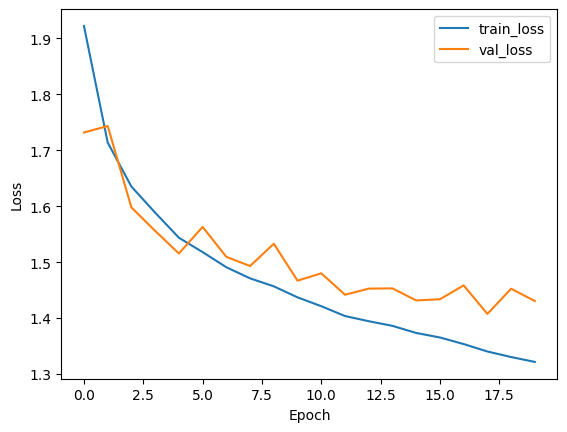

In [ ]:
import matplotlib.pyplot as plt

#
# Visualization of Loss and Accuracy
#
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train_loss')
plt.plot(epoch, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

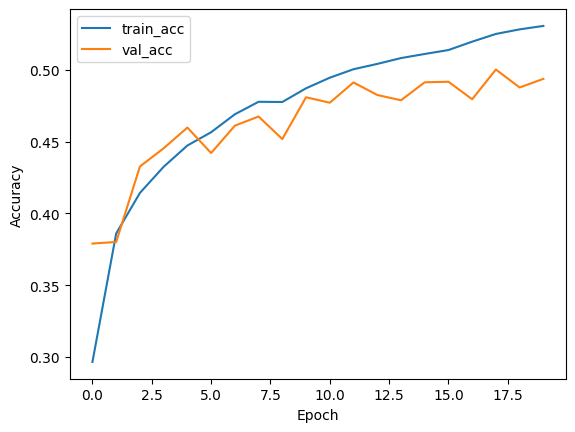

In [ ]:
plt.plot(epoch, acc, label='train_acc')
plt.plot(epoch, val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Step 4 Evaluate Model#

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4306 - accuracy: 0.4936


In [ ]:
print('loss = ',loss)
print('accuracy = ',accuracy)

loss =  1.4305886030197144
accuracy =  0.4936000108718872


In [ ]:
#
# Save Model
#
model.save('/content/drive/MyDrive/app/CIFAR.h5') # you can transfer this for deployment

#Step 5 Make Prediction#

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

#
# Load back the Model
#
loaded_model = load_model('/content/drive/MyDrive/app/CIFAR.h5') # we will use its predict method

#
# Load and Convert Image
#
# img_digit_one_sample.bmp can be found here:
# https://drive.google.com/open?id=1RnqbnoRV5VWfEuWcDrtMXmB7tjZo41oK
#
# img_digit_four_sample.bmp can be found here:
# https://drive.google.com/open?id=1zyNBk8zNEDpdYPy0KzxlGda5SAKXo7ds
#
# img_digit_eight_sample.bmp can be found here:
# https://drive.google.com/file/d/1rfJO6wl6wDjmN7Dqu7ELr5FhGBW0Bswr
#
# For color, the default is color_mode='rgb'
#
#img = load_img(path="/content/drive/MyDrive/app/img_digit_one_sample.bmp", color_mode = "grayscale", target_size=(28,28))
#img = load_img(path="/content/drive/MyDrive/app/img_digit_four_sample.bmp", color_mode = "grayscale", target_size=(28,28))
img = load_img(path="/content/drive/MyDrive/app/Ship.jpeg", color_mode = "rgb", target_size=(32,32))

#
# Pre-processing of input image data
#
imgArray = img_to_array(img) #convert to numpy array
print (imgArray.shape) # (28,28,1)
imgInput = imgArray/255.0 # normalization
imgInput = imgInput.reshape(1,32,32,3) # make it into an array of arrays as predict method expects this
print (imgInput.shape)

#
# Prediction
#
predictions = loaded_model.predict(imgInput) # Predict method expects an input format of array of arrays
print(predictions)

for i,x in enumerate(predictions[0]):
  print(i, "%.4f" % x)

predicted_class=np.argmax(predictions[0])
print("The predicted image is",object[predicted_class])

object=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(object[predicted_class])

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 68ms/step
[[7.91669786e-01 3.55027840e-02 2.16888245e-02 3.38758645e-03
  1.34584168e-02 1.21014623e-03 2.61687761e-04 6.08903775e-03
  1.19704045e-01 7.02763116e-03]]
0 0.7917
1 0.0355
2 0.0217
3 0.0034
4 0.0135
5 0.0012
6 0.0003
7 0.0061
8 0.1197
9 0.0070
The predicted image is airplane
airplane
